# Exercise 3.4 Theta method

Implement the $\theta$-method for the diffusion equation and test the method for different values of $\theta$.

$$u_t = D \cdot u_{xx} + \alpha \cdot u_x\ \text{ for $x$ in } \ [0, 1]\\
u(0,t) = u(1, t) = 0 \text{ for } t \in [0,0.1]\\
u(x,0) = u_0 (x)=4x-4x^2\text{ for }0 \leq x \leq 1
$$

$$$$

## Diskrititisation
\begin{align}
&x_m=mh\qquad t_n=nk&\\
&u_t^x=\frac{u(t+k,x)-u(t,x)}{k}&\\
&u_{xx}^t=\frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}&\\
&u_{m}^{n+1}=\lambda u_{m-1}^{n} +(1-2\lambda)u_{m}^{n} +\lambda u_{m+1}^{n} & \lambda=\frac{k}{h^2}
\end{align}

## Structure of the column ordering(y-direction)
$U^{n+1}=L\cdot U^{n}$

$$
\begin{bmatrix}
u^1_1 \\
\vdots\\
u^1_{n-1}\\
u^2_1\\
\vdots\\
u^{n-1}_1\\
\vdots\\
u_{n-1}^{m-1}
\end{bmatrix}=
\begin{bmatrix}
1-2\lambda & 2 & 3\\
a & 1-2\lambda & c
\end{bmatrix}\cdot
\begin{bmatrix}
1 \\
a 
\end{bmatrix}
$$

In [1]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

M = 40 # GRID POINTS on space interval
N = 70 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 0.2

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.1  # Diffusion coefficient
alpha = -3 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

print(f'r = {r}')

# ----- Creates grids -----
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# ----- Initializes matrix solution U -----
U = np.zeros((M, N))

# ----- Initial condition -----
U[:,0] = 4*xspan - 4*xspan**2

# ----- Dirichlet Boundary Conditions -----
U[0,:] = 0.0
U[-1,:] = 0.0

#print(xspan[2],'\n\n',2*dx,'\n\n',tspan[2],'\n\n',2*dt)

r = 0.44086956521739135


## Stabilility Condition 
$$\Delta t \leq \frac{\Delta x^2}{2D}$$
Here $D=1$ so,
$$k \leq \frac{h^2}{2}$$

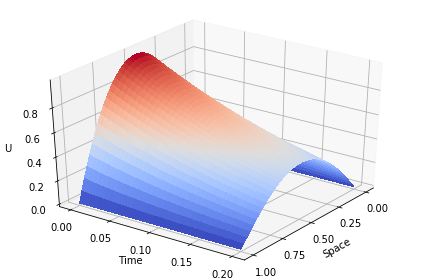

In [2]:
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = r*U[i-1, k] + (1-2*r+s)*U[i,k] + r*U[i+1,k] 

T, X = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')
ax.view_init(elev=33, azim=36)
plt.tight_layout()
plt.show()